In [1]:
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Loading data from soccer dataset

In [2]:
# Load dataset
names = ['season','date','league_id','league','team1','team2','spi1','spi2','prob1','prob2','probtie','proj_score1','proj_score2','importance1','importance2','score1','score2','xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2']
dataset_spi_matches = read_csv('../data/spi_matches.csv', names=names)
dataset_spi_matches  = dataset_spi_matches.dropna()

Initialize Linear regression and Polynomial regression based on degree 2, 3, 4 and 5

In [3]:
linear_model = LinearRegression()
polynomial_model2 = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
polynomial_model3 = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
polynomial_model4 = make_pipeline(PolynomialFeatures(degree=4),LinearRegression())
polynomial_model5 = make_pipeline(PolynomialFeatures(degree=5),LinearRegression())

Drop unnessersary data attributes

In [4]:
dataset_spi_matches = dataset_spi_matches.drop(['season','date','league_id','league','probtie'], axis=1)
print(dataset_spi_matches)
label_encoder = preprocessing.LabelEncoder()

                      team1                 team2   spi1   spi2   prob1  \
10                   Bastia   Paris Saint-Germain  51.16  85.68  0.0463   
11                AS Monaco              Guingamp  68.85  56.48  0.5714   
12                Hull City        Leicester City  53.57  66.81  0.3459   
13           Crystal Palace  West Bromwich Albion  55.19  58.66  0.4214   
14                  Everton     Tottenham Hotspur  68.02  73.25  0.3910   
15                  Burnley          Swansea City  58.98  59.74  0.4482   
16              Southampton               Watford  69.49  59.33  0.5759   
17            Middlesbrough            Stoke City  56.32  60.35  0.4380   
18                 Bordeaux            St Etienne  62.01  64.92  0.4232   
19          Manchester City            Sunderland  86.42  53.64  0.8152   
20                     Caen               Lorient  55.00  47.64  0.4737   
21                Dijon FCO                Nantes  55.00  54.90  0.4471   
22                     Me

Show the relationship between team and score, prob and score.

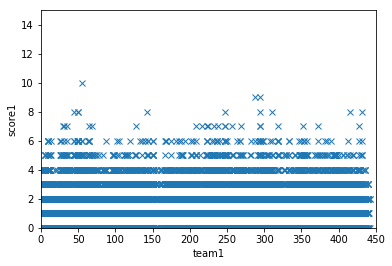

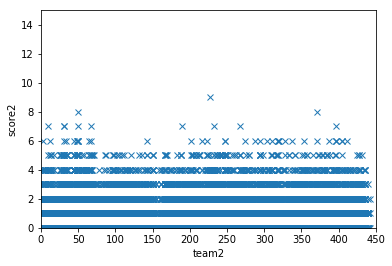

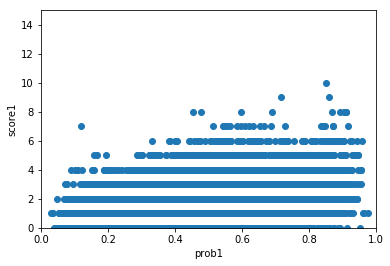

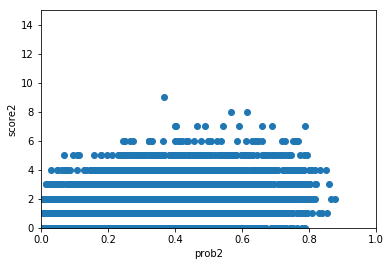

In [5]:
pyplot.plot(label_encoder.fit_transform(dataset_spi_matches['team1']),dataset_spi_matches['score1'],'x')
pyplot.ylabel('score1')
pyplot.xlabel('team1')
pyplot.axis([0, 450, 0, 15])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(dataset_spi_matches['team2']),dataset_spi_matches['score2'],'x')
pyplot.ylabel('score2')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 15])
pyplot.show()

pyplot.plot(dataset_spi_matches['prob1'],dataset_spi_matches['score1'],'o')
pyplot.ylabel('score1')
pyplot.xlabel('prob1')
pyplot.axis([0, 1, 0, 15])
pyplot.show()

pyplot.plot(dataset_spi_matches['prob2'],dataset_spi_matches['score2'],'o')
pyplot.ylabel('score2')
pyplot.xlabel('prob2')
pyplot.axis([0, 1, 0, 15])
pyplot.show()

In a soccer game, there is an extremely important feature that is easily overlooked. It is home and away information. For the soccer team, the home stadium means a more familiar environment, more affectionate fans, and more enthusiastic voices. Perhaps, this is difficult to reflect from the data, but this potential data has an important influence on the team's victory.

For the away team, the weight will be lower than the home team, which allows us to get more accurate results when predicting the score.

We hope to introduce home and away information to assist our regression model to learn more accurate regression equations to predict the team's score.

For home team.
Training our regression model base on dataset.

In [6]:
linear_model = linear_model.fit(label_encoder.fit_transform(dataset_spi_matches['team1']).reshape(-1, 1),dataset_spi_matches['score1'])
polynomial_model2 = polynomial_model2.fit(label_encoder.fit_transform(dataset_spi_matches['team1']).reshape(-1, 1),dataset_spi_matches['score1'])
polynomial_model3 = polynomial_model3.fit(label_encoder.fit_transform(dataset_spi_matches['team1']).reshape(-1, 1),dataset_spi_matches['score1'])
polynomial_model4 = polynomial_model4.fit(label_encoder.fit_transform(dataset_spi_matches['team1']).reshape(-1, 1),dataset_spi_matches['score1'])
polynomial_model5 = polynomial_model5.fit(label_encoder.fit_transform(dataset_spi_matches['team1']).reshape(-1, 1),dataset_spi_matches['score1'])

Predit results for all models

In [7]:
all_teams = np.array(list(set(dataset_spi_matches['team1'])))
# print(all_teams)
predictions11 = linear_model.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))
predictions12 = polynomial_model2.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))
predictions13 = polynomial_model3.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))
predictions14 = polynomial_model4.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))
predictions15 = polynomial_model5.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))

print all the results if correctly.

In [8]:
print(predictions11)
print(predictions12)
print(predictions13)
print(predictions14)
print(predictions15)

[1.52883021 1.56478509 1.52839307 1.56631508 1.54117945 1.5699215
 1.56675222 1.55090585 1.54609729 1.52653522 1.53309234 1.55997653
 1.56238081 1.56587794 1.56795436 1.55079656 1.52861164 1.52445879
 1.55451226 1.55221727 1.56380152 1.53199948 1.53025092 1.55855582
 1.56303652 1.52675379 1.55538655 1.53003235 1.52434951 1.52511451
 1.53549661 1.53221805 1.56052296 1.56609651 1.54445801 1.53495019
 1.55527726 1.56041367 1.55243584 1.54041445 1.52380308 1.53768232
 1.546753   1.55921153 1.54478587 1.52391237 1.53888446 1.52730021
 1.57057721 1.55899296 1.54511372 1.5557144  1.55790011 1.54216302
 1.53866589 1.56576866 1.55932082 1.54391159 1.5258795  1.54128874
 1.55188942 1.55680726 1.54697158 1.55046871 1.56871936 1.56402009
 1.54653443 1.53331091 1.52522379 1.53265519 1.53232734 1.53735446
 1.56598723 1.5519987  1.52806521 1.54292802 1.54664372 1.53254591
 1.56522223 1.55341941 1.5564794  1.55768154 1.56183438 1.55112442
 1.55254513 1.55910225 1.5236938  1.54882943 1.54423944 1.53505

Show all the prediction results based on different regression models

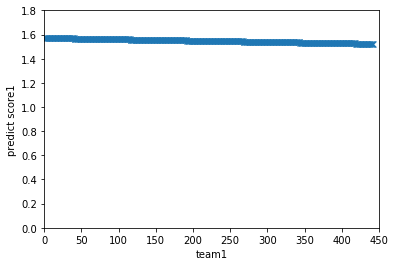

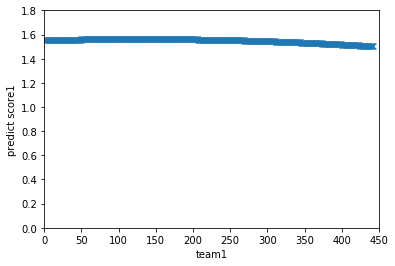

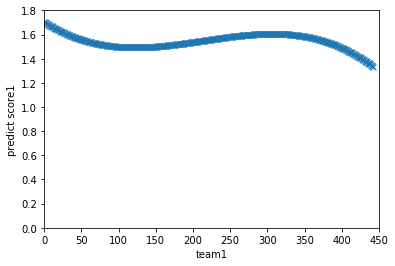

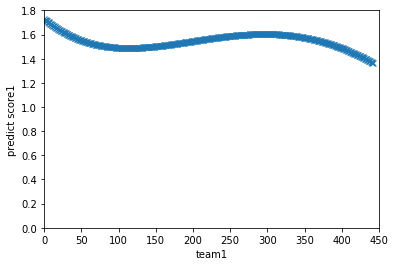

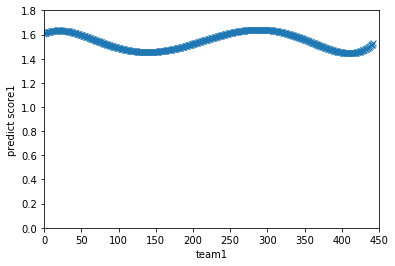

In [9]:
pyplot.plot(label_encoder.fit_transform(all_teams),predictions11,'x')
pyplot.ylabel('predict score1')
pyplot.xlabel('team1')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),predictions12,'x')
pyplot.ylabel('predict score1')
pyplot.xlabel('team1')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),predictions13,'x')
pyplot.ylabel('predict score1')
pyplot.xlabel('team1')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),predictions14,'x')
pyplot.ylabel('predict score1')
pyplot.xlabel('team1')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),predictions15,'x')
pyplot.ylabel('predict score1')
pyplot.xlabel('team1')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

For away team.
Training our regression model base on dataset.

In [10]:
linear_model = linear_model.fit(label_encoder.fit_transform(dataset_spi_matches['team2']).reshape(-1, 1),dataset_spi_matches['score2'])
polynomial_model2 = polynomial_model2.fit(label_encoder.fit_transform(dataset_spi_matches['team2']).reshape(-1, 1),dataset_spi_matches['score2'])
polynomial_model3 = polynomial_model3.fit(label_encoder.fit_transform(dataset_spi_matches['team2']).reshape(-1, 1),dataset_spi_matches['score2'])
polynomial_model4 = polynomial_model4.fit(label_encoder.fit_transform(dataset_spi_matches['team2']).reshape(-1, 1),dataset_spi_matches['score2'])
polynomial_model5 = polynomial_model5.fit(label_encoder.fit_transform(dataset_spi_matches['team2']).reshape(-1, 1),dataset_spi_matches['score2'])

Predit results for all models

In [11]:
all_teams = np.array(list(set(dataset_spi_matches['team2'])))
# print(all_teams)
predictions21 = linear_model.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))
predictions22 = polynomial_model2.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))
predictions23 = polynomial_model3.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))
predictions24 = polynomial_model4.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))
predictions25 = polynomial_model5.predict(label_encoder.fit_transform(all_teams).reshape(-1, 1))

print all the results if correctly.

In [12]:
print(predictions21)
print(predictions22)
print(predictions23)
print(predictions24)
print(predictions25)

[1.18481383 1.16911883 1.18547368 1.17463329 1.18702904 1.18566221
 1.1755288  1.17882805 1.17675423 1.16831758 1.17114551 1.18274001
 1.18377692 1.18528515 1.18618066 1.17878091 1.16921309 1.16742207
 1.18038341 1.17939363 1.18438964 1.17067419 1.16992008 1.1821273
 1.18405971 1.16841185 1.18076046 1.16982581 1.16737494 1.16770487
 1.17218242 1.17076845 1.18297567 1.18537941 1.17604725 1.17194676
 1.18071333 1.18292854 1.1794879  1.17430336 1.16713928 1.17312506
 1.16935449 1.18632206 1.18241009 1.17618865 1.16718641 1.17364351
 1.16864751 1.18731183 1.18231582 1.17633004 1.18090186 1.1818445
 1.17505748 1.17354925 1.18523802 1.18245722 1.17581159 1.16803479
 1.17468042 1.17925224 1.18137318 1.17713129 1.17863952 1.18651058
 1.1844839  1.17694276 1.17123977 1.167752   1.17095698 1.17081559
 1.17298366 1.18533228 1.17929937 1.16897743 1.1753874  1.17698989
 1.17090985 1.18500236 1.17991209 1.18123179 1.18175024 1.18354126
 1.17892231 1.17953503 1.18236296 1.16709215 1.17793254 1.175952

Show all the prediction results based on different regression models

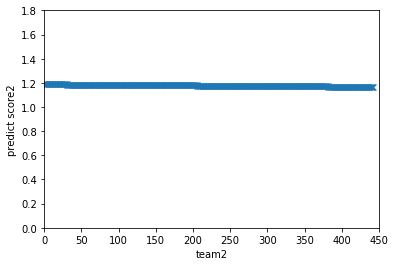

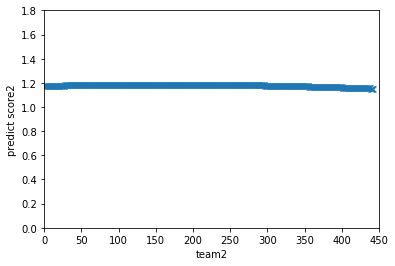

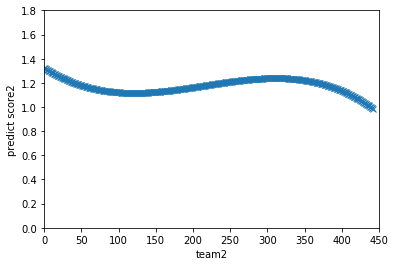

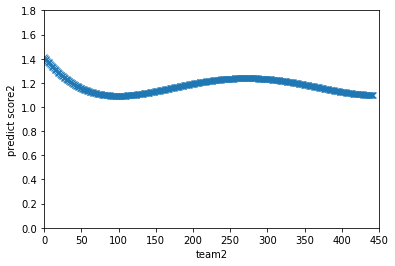

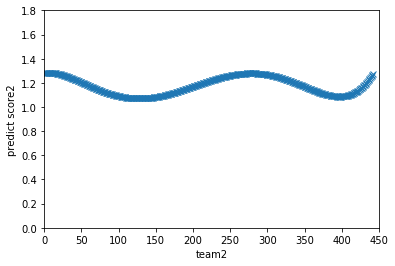

In [14]:
pyplot.plot(label_encoder.fit_transform(all_teams),predictions21,'x')
pyplot.ylabel('predict score2')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),predictions22,'x')
pyplot.ylabel('predict score2')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),predictions23,'x')
pyplot.ylabel('predict score2')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),predictions24,'x')
pyplot.ylabel('predict score2')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),predictions25,'x')
pyplot.ylabel('predict score2')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

combine home and away infromation based on two featrues

In [15]:
#### combine two weights
p1 = (predictions11 + predictions21)/2
p2 = (predictions12 + predictions22)/2
p3 = (predictions13 + predictions23)/2
p4 = (predictions14 + predictions24)/2
p5 = (predictions15 + predictions25)/2

Create and show the new prediction results

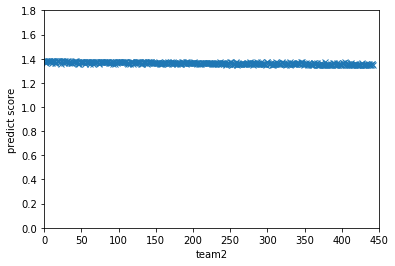

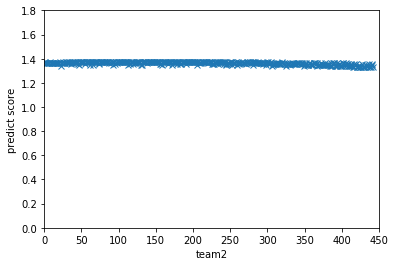

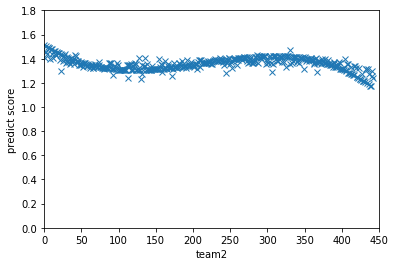

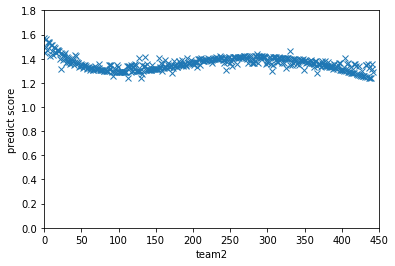

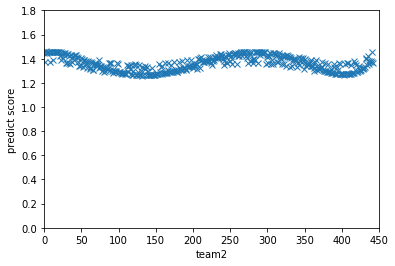

In [16]:
pyplot.plot(label_encoder.fit_transform(all_teams),p1,'x')
pyplot.ylabel('predict score')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),p2,'x')
pyplot.ylabel('predict score')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),p3,'x')
pyplot.ylabel('predict score')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),p4,'x')
pyplot.ylabel('predict score')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()

pyplot.plot(label_encoder.fit_transform(all_teams),p5,'x')
pyplot.ylabel('predict score')
pyplot.xlabel('team2')
pyplot.axis([0, 450, 0, 1.8])
pyplot.show()